## Calling & Rendering

In [4]:
import gymnasium as gym

In [5]:
# How to see all the possible environments
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v0        FrozenLake-v1
FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== mujoco =====
Ant-v2                 Ant-v3                 Ant-v4
Ant-v5                 HalfCheetah-v2         HalfCheetah-v3
HalfCheetah-v4         HalfCheetah-v5         Hopper-v2
Hopper-v3              Hopper-v4              Hopper-v5
Humanoid-v2            Humanoid-v3            Humanoid-v4
Humanoid-v5            HumanoidStandup-v2     HumanoidStandup-v4
HumanoidStandup-v5     InvertedDoublePendulum-v2 InvertedDoublePendulum-v4
InvertedDoublePendulu

### Taxi Environment

In [2]:
import gymnasium as gym 
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import gymnasium as gym

env = gym.make('Taxi-v3', render_mode='human')
env.reset()

for _ in range(5):
    action = env.action_space.sample()
    env.step(action)

env.close()

In [3]:
env = gym.make('Taxi-v3', render_mode='ansi')
env.reset()

frame = env.render()
print(frame)

env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




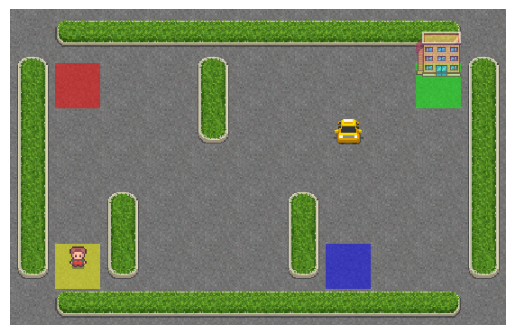

In [4]:
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3', render_mode='rgb_array')
env.reset()

frame = env.render()

plt.imshow(frame)
plt.axis('off')
plt.show()

env.close()

In [5]:
print(env.observation_space)
print(env.action_space)

Discrete(500)
Discrete(6)


In [16]:
state = env.reset()[0]
print('State number:', state)

taxi_row, taxi_col, passenger_loc, destination = env.unwrapped.decode(state)
print(f"Taxi at ({taxi_row}, {taxi_col}), Passenger at {passenger_loc}, Destination {destination}")

State number: 126
Taxi at (1, 1), Passenger at 1, Destination 2


In [17]:
actions = {
    0: "South",
    1: "North",
    2: "East",
    3: "West",
    4: "Pickup",
    5: "Dropoff"
}

for a in range(env.action_space.n):
    print(f"Action {a}: {actions[a]}")

Action 0: South
Action 1: North
Action 2: East
Action 3: West
Action 4: Pickup
Action 5: Dropoff


In [39]:
env = gym.make("Taxi-v3", render_mode='ansi')
state = env.reset()[0]

print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [42]:
import time 

# Create Taxi Environment with text based rendering
env = gym.make("Taxi-v3", render_mode = 'ansi')
state, info = env.reset()

print("Initial State:")
print(env.render())

# Number of steps to watch
steps = 10

# Possible actions
actions = {
    0: "South",
    1: "North",
    2: "East",
    3: "West",
    4: "Pickup",
    5: "Dropoff"
}

for step in range(steps):
    action = env.action_space.sample() #pick a random action
    next_state, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}: Action = {actions[action]} | Reward = {reward}")
    print(env.render())

    # Pause to make easier to follow
    time.sleep(1)

    if terminated or truncated:
        print("Finished")
        break

env.close()

Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Step 1: Action = North | Reward = -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


Step 2: Action = Pickup | Reward = -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


Step 3: Action = Pickup | Reward = -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


Step 4: Action = South | Reward = -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


Step 5: Action = North | Reward = -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


Step 6: Action = Pickup | Reward = -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


Step 7: Action = West | Reward = -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |

In [6]:
import numpy as np 

# Create Environment
env = gym.make('Taxi-v3')

# Initialize Q tabe: 500 states x 6 actions
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters 
alpha = 0.1     #learning rate
gamma = 0.6     #discount factor
epsilon = 0.1   #exploration rate

# Training parameters 
episodes = 10000

for episode in range(episodes):
    state, info = env.reset()
    done = False

    while not done:
        # ε-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  #explore
        else:
            action = np.argmax(q_table[state])  #exploit best state
        
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Q-learning update rule
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

print('Training Finished')
env.close()

Training Finished


In [10]:
env = gym.make('Taxi-v3', render_mode = 'ansi')

state, info = env.reset()
done = False 
total_rewards = 0

print(env.render())

while not done:
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_rewards += reward 

    print(env.render())

print(f'Total Rewards: {total_rewards}')
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Total Rewards: 12


Taxi-v3
- **Main Elements**: Navigate a taxi to pick up and drop off passengers on a 5x5 grid.
- **Observation Space (S)**: Discrete(500) — Represents taxi location * passenger location * destination.
- **Action Space (A)**: Discrete(6) — [South, North, East, West, Pickup, Dropoff].
- **Reward Function (R)**: 
  - -1 per step,
  - -10 for invalid pickup/dropoff,
  - +20 for successful drop-off.
- **Type**: Fully Discrete.
- **Complexities**: Requires efficient routing and correct action timing.

### Lunar Landing Environment

Install swig  
Install Build Tools Package (Modify and add first one)  
Install gymnasium[box2d]  
If problem "pip install gymnasium[box2d] -vvv       for verbose  

In [11]:
# Initialise the environment
env = gym.make("LunarLander-v3", render_mode="human")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):
    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [4]:
import gymnasium as gym

env = gym.make('LunarLander-v3', render_mode='human')
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)

env.close()

LunarLander-v3
- **Main Elements**: Control a lunar module to land safely using thrusters.
- **Observation Space (S)**: Box(8,) — Continuous values (position, velocity, angle, leg contact).
- **Action Space (A)**: Discrete(4) — [Do nothing, Fire Left, Fire Main, Fire Right].
- **Reward Function (R)**: 
  - Positive reward for smooth landing,
  - Penalty for crashing,
  - Small penalties for fuel usage.
- **Type**: Continuous observation, Discrete action.
- **Complexities**: Physics-based control with precision landing.

### Frozen Lake

In [8]:
import gymnasium as gym

# Create the environment
env = gym.make('FrozenLake-v1', render_mode='human', map_name="4x4", is_slippery=True)

state = env.reset()

for i in range(100):
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()


FrozenLake-v1
- **Main Elements**: Navigate across a frozen grid avoiding holes to reach the goal.
- **Observation Space (S)**: Discrete(16) — Each cell in a 4x4 grid.
- **Action Space (A)**: Discrete(4) — [Left, Down, Right, Up].
- **Reward Function (R)**: 
  - +1 for reaching the goal,
  - 0 otherwise.
- **Type**: Fully Discrete (Stochastic if slippery).
- **Complexities**: Simple navigation, but randomness adds unpredictability.